Accuracy of Decision Tree on winequality-red: 0.5729166666666666
Cross-validation scores: [0.496875   0.453125   0.4875     0.49375    0.47335423]
Average cross-validation score: 0.4809208463949843


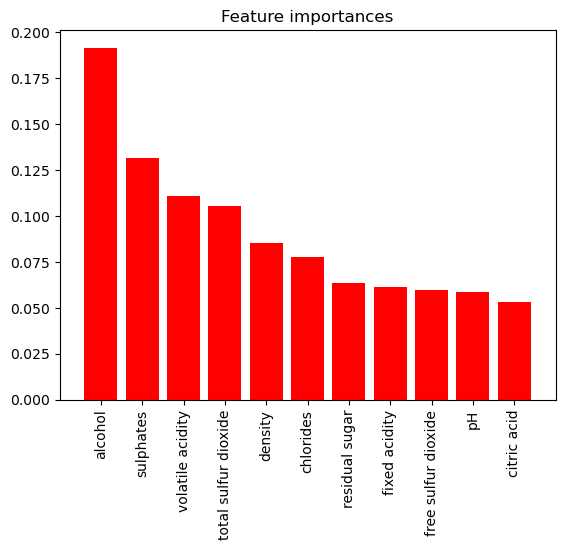

Accuracy of Decision Tree on winequality-white: 0.5884353741496599
Cross-validation scores: [0.38265306 0.36836735 0.40204082 0.42594484 0.42288049]
Average cross-validation score: 0.400377311292239


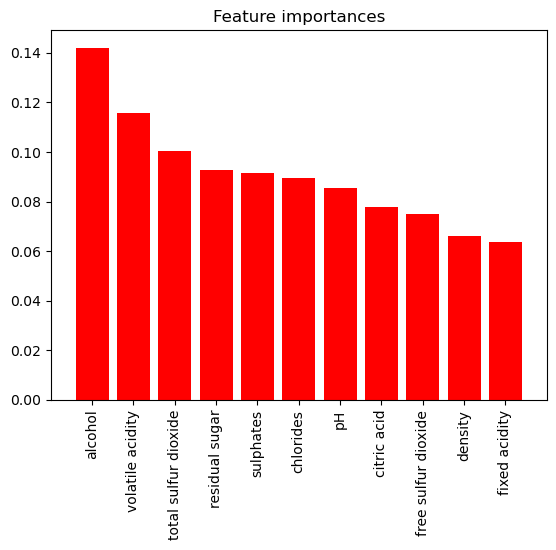

In [12]:
import DataHandler as dh
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree
import numpy as np

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

datasets = dh.read_data("data/full")

for dataset_name, df in datasets.items():
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1] 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = DecisionTreeClassifier(random_state=42)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of Decision Tree on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X, y, cv=5)
    print(f"Cross-validation scores: {scores}")
    print(f"Average cross-validation score: {scores.mean()}")

    plt.show()

    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.show()

    class_names = [str(i) for i in sorted(y.unique())]
    dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=class_names, filled=True, rounded=True)
    graph = graphviz.Source(dot_data)
    graph

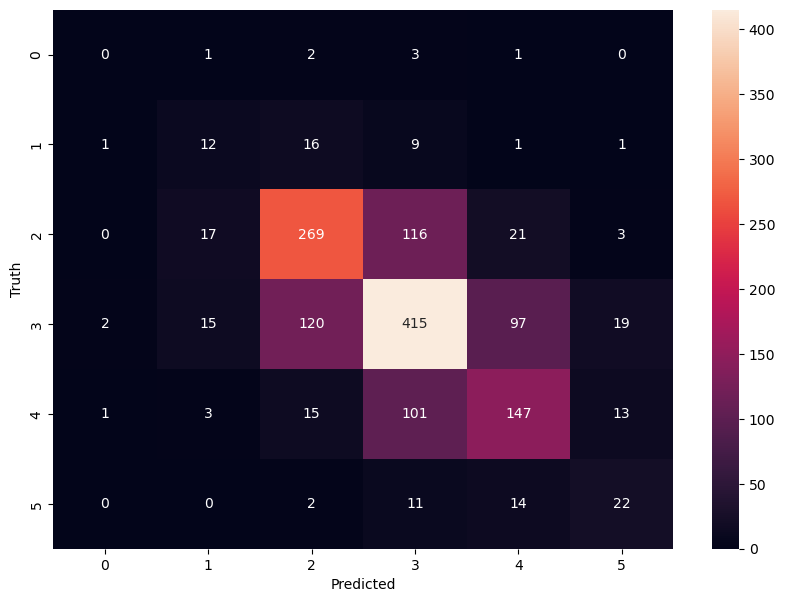

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()